In [1]:
# Install the dependencies

# !pip install matplotlib
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from datetime import datetime
import numpy as np

In [6]:
#import data and clean data 

data = pd.read_csv("Traffic_Violations.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154357 entries, 0 to 154356
Data columns (total 37 columns):
Unnamed: 0                 154357 non-null int64
SeqID                      154357 non-null object
Date Of Stop               154357 non-null object
Time Of Stop               154357 non-null object
Agency                     154357 non-null object
SubAgency                  154357 non-null object
Description                154357 non-null object
Location                   154357 non-null object
Latitude                   154357 non-null float64
Longitude                  154357 non-null float64
Accident                   154357 non-null object
Belts                      154357 non-null object
Personal Injury            154357 non-null object
Property Damage            154357 non-null object
Fatal                      154357 non-null object
Commercial License         154357 non-null object
HAZMAT                     154357 non-null object
Commercial Vehicle         154357 non-

In [7]:
data.head()

,Unnamed: 0,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,278508,8f3adb87-3bd3-47cd-83a3-565adc2451d5,09/24/2016,22:38:00,MCP,"2nd District, Bethesda",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,ROCKVILLE PIKE @ JONES BRIDGE RD,38.996395,-77.096420,...,13-401(h),Transportation Article,False,OTHER,M,BETHESDA,MD,MD,A - Marked Patrol,"(38.996395, -77.09642)"
1,289430,c3cd94af-4b86-46cb-bf44-879067d9386a,12/16/2016,22:10:00,MCP,"4th District, Wheaton",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,ASPEN HILL @ CONNECTICUT,39.082190,-77.077323,...,13-401(h),Transportation Article,False,WHITE,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.08219, -77.0773233333333)"
2,295747,5d3f53a5-cde0-468a-bad6-3f63c61d37a2,05/14/2015,09:08:00,MCP,"2nd District, Bethesda",DRIVER FAILURE TO STOP AT STOP SIGN LINE,CRYSTAL ROCK/ WATERS LANDING,39.196557,-77.273340,...,21-707(a),Transportation Article,False,WHITE,M,GERMANTOWN,MD,MD,A - Marked Patrol,"(39.1965566666667, -77.27334)"
3,70800,27b9c3a8-805e-45c9-810d-7742d567c5e6,10/20/2012,19:43:00,MCP,"1st District, Rockville",DRIVING TO DRIVE MOTOR VEHICLE ON HIGHWAY WITH...,VEIRS MILL RD AT GRIDLEY RD,0.000000,0.000000,...,16-101(a),Transportation Article,False,WHITE,M,LANGLEY PARK,MD,XX,A - Marked Patrol,"(0.0, 0.0)"
4,105364,1274d66f-56dc-4933-b442-1bd471e65799,11/02/2018,14:50:00,MCP,"3rd District, Silver Spring",EXCEEDING THE POSTED SPEED LIMIT OF 40 MPH,NEW HAMPSHIRE/ LOCKWOOD,0.000000,0.000000,...,21-801.1,Transportation Article,False,OTHER,M,ELKRIDGE,MD,MD,A - Marked Patrol,"(0.0, 0.0)"


In [8]:
data["Date Of Stop"] = pd.to_datetime(data["Date Of Stop"],format="%m/%d/%Y")

In [9]:
sum(data.duplicated(keep=False))

0

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
sum(data.duplicated(keep=False))

0

In [12]:
data['Year of Violation'] = data['Date Of Stop'].dt.year

## Let's make a line plot

What will you use?

Method: matplotlib.pyplot.plot() or plt.plot()

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot




In [13]:
## Sample data:
## Fruit Production over the years

year = [2010,2011,2012,2013,2015,2016,2017,2018,2019]
fruitprod = [500,600,10000,1000,2000,5000,20000,500,5000]
productiondf = pd.DataFrame({"Year":year,"Fruit Prod":fruitprod})
productiondf

,Year,Fruit Prod
0,2010,500
1,2011,600
2,2012,10000
3,2013,1000
4,2015,2000
5,2016,5000
6,2017,20000
7,2018,500
8,2019,5000


In [65]:
x = productiondf["Year"]
y=productiondf["Fruit Prod"]

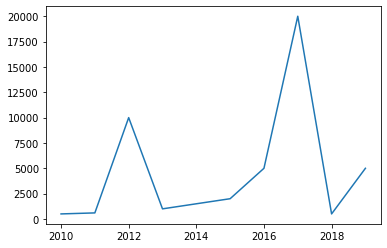

In [66]:
plt.plot(x,y);

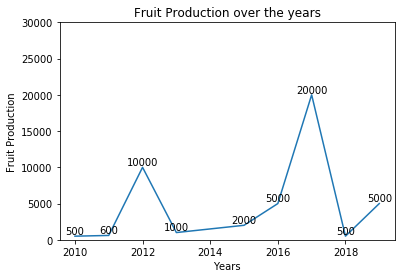

In [67]:
#Let's add some labels and titles
plt.plot(x,y);
plt.title("Fruit Production over the years")
plt.xlabel("Years")
plt.ylabel("Fruit Production")
plt.ylim(0,30000)

for x,y in zip(x,y):

    label = "{:}".format(y)

    plt.annotate(label,# this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can b

In [24]:
## Traffic Data: Traffic Violations over the years
timeline = data.groupby("Year of Violation")
timelinegb =timeline["SeqID"].count()
timelinegb

Year of Violation
2012    151153
2013    190242
2014    223497
2015    235138
2016    219492
2017    198961
2018    218022
2019    105200
Name: SeqID, dtype: int64

In [26]:
timelinedf=pd.DataFrame(timelinegb)
timelinedf = timelinedf.reset_index()
timelinedf.rename(columns={"SeqID":"Traffic Violations"},inplace=True)
timelinedf

,Year of Violation,Traffic Violations
0,2012,151153
1,2013,190242
2,2014,223497
3,2015,235138
4,2016,219492
5,2017,198961
6,2018,218022
7,2019,105200


## Now you try :)

In [ ]:
## Identify your arguments. What is x and what is y?

x = 
y = 

In [ ]:
## Plot the data and add labels

plt.plot();
plt.title()
plt.xlabel()
plt.ylabel()

for x,y in zip(x,y):

    label = "{:,}".format(y)

    plt.annotate(label,# this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can 
plt.show()

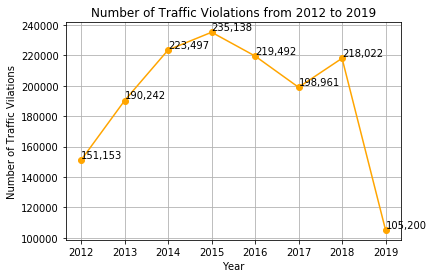

In [158]:
## Identify your arguments. What is x and what is y?

x=timelinedf["Year of Violation"]
y=timelinedf["Traffic Violations"]

plt.plot(x,y,color = "orange",marker="o")
plt.title("Number of Traffic Violations from 2012 to 2019")
plt.xlabel("Year")
plt.ylabel("Number of Traffic Vilations")
#plt.ylim(0,240000)
plt.grid(b=True)

for x,y in zip(x,y):

    label = "{:,}".format(y)

    plt.annotate(label,# this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center
plt.show()

## Let's make a bar graph

What will you use?

Method: matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)[source]

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar

In [115]:
productiondf["Fruit_Company"] = ["Dole","Chiquita","Dole","Chiquita","Dole","Banana","Banana","Dole","Chiquita"]
productiondf

,Year,Fruit Prod,Fruit_Company
0,2010,500,Dole
1,2011,600,Chiquita
2,2012,10000,Dole
3,2013,1000,Chiquita
4,2015,2000,Dole
5,2016,5000,Banana
6,2017,20000,Banana
7,2018,500,Dole
8,2019,5000,Chiquita


In [119]:
fruit_count = productiondf.groupby("Fruit_Company")
fruit_countdf = fruit_count["Year"].count()
fruit_countdf = pd.DataFrame(fruit_countdf)
fruit_countdf.rename(columns={"Year":"Count"},inplace = True)
fruit_countdf.reset_index(inplace=True)

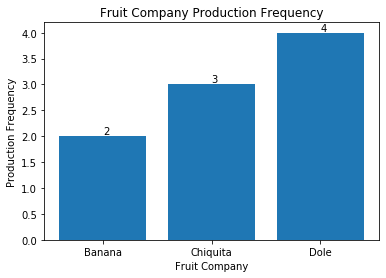

In [123]:
x=fruit_countdf["Fruit_Company"]
y = fruit_countdf["Count"]

plt.bar(x,y)
plt.title("Fruit Company Production Frequency")
plt.xlabel("Fruit Company")
plt.ylabel("Production Frequency")

for x,y in zip(x,y):

    label = "{:,}".format(y)

    plt.annotate(label,# this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or ce

## Easier Way


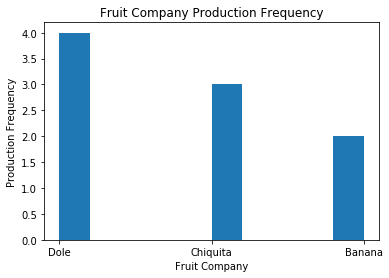

In [132]:
plt.hist(productiondf["Fruit_Company"]);
plt.title("Fruit Company Production Frequency")
plt.xlabel("Fruit Company")
plt.ylabel("Production Frequency")
plt.show();

## Now you try :)


In [138]:
gendergb = data.groupby("Gender")
genderdata = gendergb["SeqID"].count()
genderdf = pd.DataFrame(genderdata)
genderdf = genderdf.reset_index()
genderdf = genderdf.rename(columns={"SeqID":"Gender_Count"})
genderdf = genderdf.replace({"F":"Female","M":"Male","U":"Unknown"})
genderdf

,Gender,Gender_Count
0,Female,507501
1,Male,1032258
2,Unknown,1946


In [ ]:
x = 
y =
plt.bar()
plt.title()
plt.xlabel()
plt.ylabel()
plt.show();

for x,y in zip(x,y):

    label = "{:,}".format(y)

    plt.annotate(label,# this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,3), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or ce




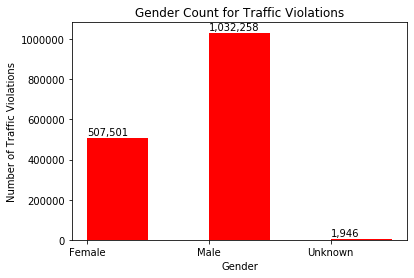

In [171]:
x=genderdf["Gender"]
y=genderdf["Gender_Count"]

plt.bar(x,y,color = "red",width = .50,align = "edge")
plt.title("Gender Count for Traffic Violations")
plt.xlabel("Gender")
plt.ylabel("Number of Traffic Violations")
plt.xticks()

for x,y in zip(x,y):

    label = "{:,}".format(y)

    plt.annotate(label,# this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,3), # distance from text to points (x,y)
                 ha='left') # horizontal alignment can be left, right or center




## Let's make a Pie Chart

What we will use?

Method:matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, data=None)[source]

https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.pie.html#matplotlib.axes.Axes.pie

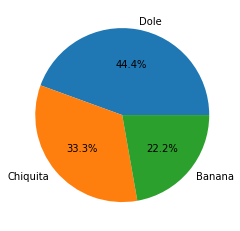

In [180]:
labels = productiondf["Fruit_Company"].unique()
data = productiondf["Fruit_Company"].value_counts()

plt.pie(data,labels=labels,autopct="%.1f%%")
plt.show()

In [190]:
racegb = data.groupby("Race")
racedata = racegb["SeqID"].count()
racedf = pd.DataFrame(racedata).rename(columns = {"SeqID": "Race_Count"})
racedf.reset_index(inplace=True)
racedf

,Race,Race_Count
0,ASIAN,90432
1,BLACK,488074
2,HISPANIC,329371
3,NATIVE AMERICAN,3181
4,OTHER,84344
5,WHITE,546303


In [ ]:
labels =
data = 
plt.pie()
plt.title()
plt.show();

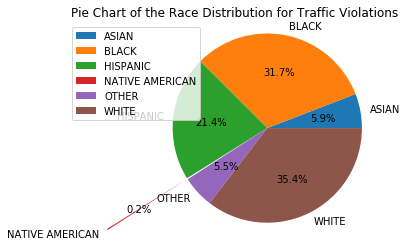

In [254]:
labels = racedf["Race"]
data = racedf["Race_Count"]
plt.pie(data,labels=labels,autopct="%.1f%%",explode = [0,0,0,1,0,0])
plt.title("Pie Chart of the Race Distribution for Traffic Violations")
plt.axis('equal') 
plt.legend(loc = "upper left")
plt.show()